# Introduction
Lending Club Case study is about loan data analysis of a consumer finance company. This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures.

# Objective
Objective of this study to identify applicants which are likely or unlikely to repay the loan. This analysis will help company to reduce bad loans, reduce the risk and increase profits.

# Team
1. Prachi Tyagi
2. Gaurav Tyagi

# Part 1
## Data loading and Data cleaning
- Removing columns having no data
- Cleaning Emp length by extracting only numbers
- Removing percentage sign from interest rate
- Coverting date to date format and extracting year out of date
- orginal dataframe contain (rows 39717, column 111)
- dataframe shape after cleaning  (row 37823, column 52)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [18]:
initialDf=pd.read_csv('loan.csv')
initialDf

C:\Users\asus\AppData\Local\Temp\ipykernel_13928\2603619253.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  initialDf=pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
print('orginal dataframe size',initialDf.shape)
# will return dataframe having null values represented as true and any will return name of columns 
df=initialDf.isna()

# Calculating Na values percentage for each column
columns=round(df.sum()/df.shape[0],2)
cleanedColumnDf=columns.reset_index().rename(columns={0:'novaluepercentage'})

# Identifying Columns with the less than 5 percent of Na values
cleanedColumnDf=cleanedColumnDf[(cleanedColumnDf['novaluepercentage']>=0) & (cleanedColumnDf['novaluepercentage']<.05)]

cleanedColumnLst=cleanedColumnDf['index'].to_list()

relevantColumns=initialDf[cleanedColumnLst]
relevantColumns=relevantColumns.dropna()
print('dataframe size after cleaning ',relevantColumns.shape)


orginal dataframe size (39717, 111)
dataframe size after cleaning  (37823, 52)


In [20]:
# Creating new column to have monthly income
relevantColumns['monthly_income']=round(relevantColumns['annual_inc']/12,2)

# Extracting numbers from emp length column by removing text and extracting only numbers
relevantColumns['emp_length_years']=relevantColumns['emp_length'].str.extract(r'(\d+)')


# removing percentage sign from interest rate
relevantColumns['intrt_without_percent_sign']=relevantColumns['int_rate'].str.rstrip('%').astype(float)

# Coverting date to date format and extracting year out of date
relevantColumns['Date'] = pd.to_datetime(relevantColumns['issue_d'], format='%b-%y')
relevantColumns['year']=  relevantColumns['Date'].dt.year

# calculating Monthly debt of borrows
relevantColumns['monthly_debt']=round(relevantColumns['dti']*relevantColumns['monthly_income'],2)

relevantColumns[['monthly_income','monthly_debt','dti','emp_length_years','intrt_without_percent_sign','Date','year']]


,monthly_income,monthly_debt,dti,emp_length_years,intrt_without_percent_sign,Date,year
0,2000.00,55300.00,27.65,10,10.65,2011-12-01,2011
1,2500.00,2500.00,1.00,1,15.27,2011-12-01,2011
2,1021.00,8903.12,8.72,10,15.96,2011-12-01,2011
3,4100.00,82000.00,20.00,10,13.49,2011-12-01,2011
4,6666.67,119600.06,17.94,1,12.69,2011-12-01,2011
...,...,...,...,...,...,...,...
39475,8389.28,55704.82,6.64,6,9.01,2007-12-01,2007
39551,6666.67,61533.36,9.23,2,10.91,2007-12-01,2007
39562,2916.67,21904.19,7.51,1,10.28,2007-11-01,2007
39573,5291.67,44979.20,8.50,3,10.59,2007-11-01,2007


# Part 2 - Univariate Analysis


### Total loan distribution in different loan status to identify what percentage of loan is a bad loan


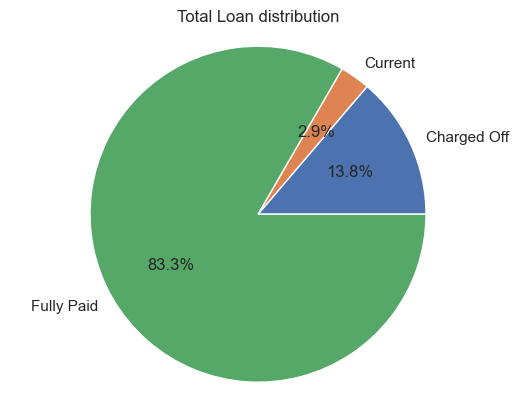

In [21]:
employementIncomeLoanStatus=relevantColumns[['id','loan_amnt','loan_status']]

# Doing group by over loan status and counting total loan amount per category. 
# finally reseting index to have loam amount and loan status as columns
pieDataDf=employementIncomeLoanStatus.groupby('loan_status')['loan_amnt'].count().reset_index()

plt.pie(pieDataDf['loan_amnt'],labels=pieDataDf['loan_status'],autopct='%1.1f%%')
plt.title('Total Loan distribution')
plt.axis('equal')
plt.show()

### Observation
- Charged Off loans are 13.8 percent of total loan

### Analyzing Loan applied, Amout Funded and Amount committed by lender


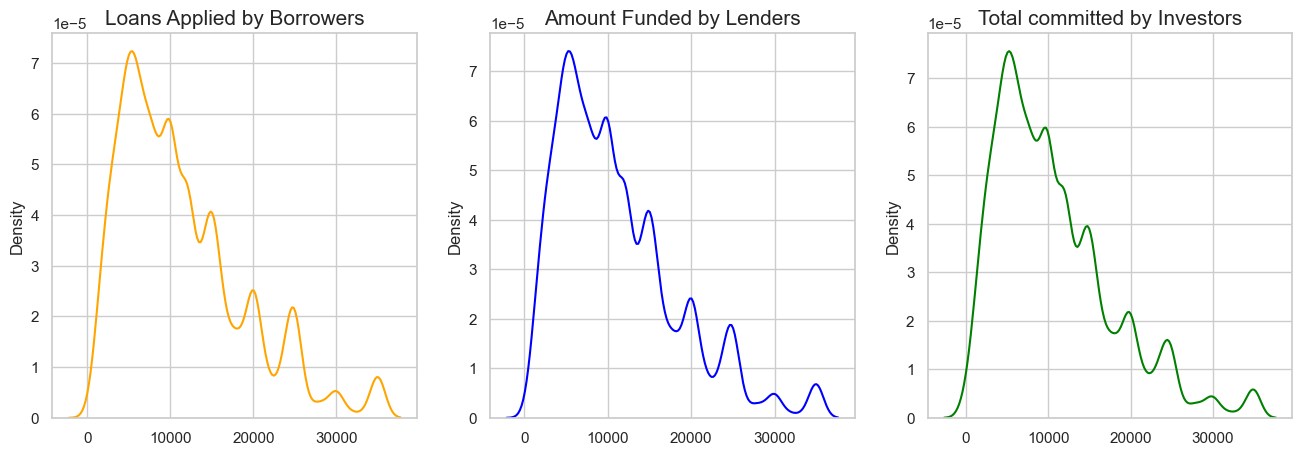

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))
loanAmount = relevantColumns["loan_amnt"].values
fundedAmount = relevantColumns["funded_amnt"].values
investorFunds = relevantColumns["funded_amnt_inv"].values

sns.kdeplot(loanAmount, ax=ax[0], color='orange')
ax[0].set_title("Loans Applied by Borrowers", fontsize=15)

sns.kdeplot(fundedAmount, ax=ax[1], color="blue")
ax[1].set_title("Amount Funded by Lenders", fontsize=15)

sns.kdeplot(investorFunds, ax=ax[2], color="green")
ax[2].set_title("Total committed by Investors", fontsize=15)

plt.show()

### Observations
- It has been observed that eligible borrowers are likely to get amount granted as loan what they have applied since graph for loan applied , amount funded and amount commited by investor are same.
- Company can make it little more difficult or process oriented to get loan disbursed

# Part 3 - Bivariate Analysis

### Analyzing Charged off loan status and dti ratio against employment experience.

C:\Users\asus\AppData\Local\Temp\ipykernel_13928\3102538579.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pieCharDtiDf=pieCharGroupBy.sum().reset_index()


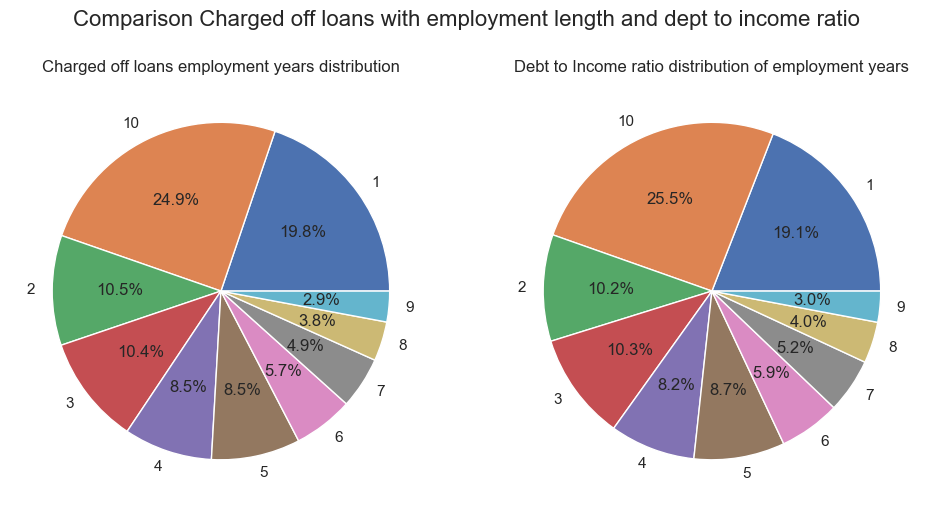

In [23]:
empLengthAnalysis=relevantColumns[['id','emp_length','loan_status','emp_length_years','dti']]

# Extracting all chargedoff loans
empLengthAnalysis=empLengthAnalysis[empLengthAnalysis.loan_status=='Charged Off']

# grouping by employment length among charged off loan
pieCharGroupBy=empLengthAnalysis.groupby('emp_length_years')

pieChar=pieCharGroupBy.count().reset_index()

pieCharDtiDf=pieCharGroupBy.sum().reset_index()

# Creating a figure with two subplots (1 row, 2 columns)
fig, axies = plt.subplots(1, 2, figsize=(10, 5))

# First pie chart
axies[0].pie(pieChar['id'],labels=pieChar['emp_length_years'], autopct='%1.1f%%')
axies[0].set_title('Charged off loans employment years distribution')

# Second pie chart
axies[1].pie(pieCharDtiDf['dti'], labels=pieCharDtiDf['emp_length_years'], autopct='%1.1f%%')
axies[1].set_title('Debt to Income ratio distribution of employment years')

fig.suptitle('Comparison Charged off loans with employment length and dept to income ratio', fontsize=16, y=1.02)

# Equal aspect ratio ensures that each pie chart is drawn as a circle
axies[0].axis('off')
axies[1].axis('off')

# Adjust layout to prevent clipping of titles
plt.tight_layout()

plt.show()



### Observation
- It is obsereved that highest percentage of charged off loans is done by people having experience 10 years or more. 
- It is evident that people with high experience have large loan liability.
- It is also clear that the people with experience upto 5 years have higher percentage of charged off loans.
- Debt to income ratio is quite high for people with upto 1 year and 10+ years of experience, increasing the risk of loan default.

### Loan status and interest rate


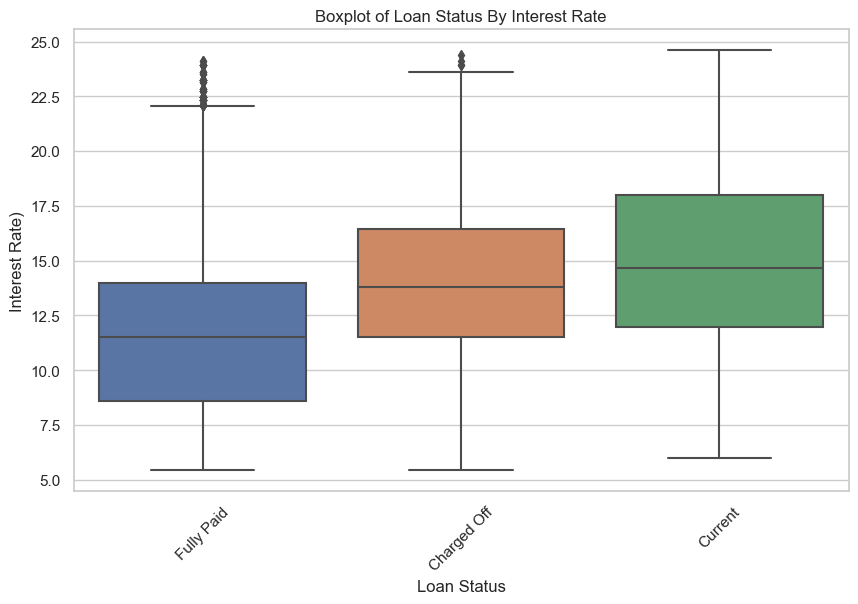

In [24]:
interestrateAnalysis=relevantColumns[['loan_status','intrt_without_percent_sign','purpose']]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))  
sns.boxplot(data=interestrateAnalysis, x="loan_status", y="intrt_without_percent_sign")
plt.xlabel("Loan Status")
plt.ylabel("Interest Rate)")
plt.title("Boxplot of Loan Status By Interest Rate")
plt.xticks(rotation=45)
plt.show()

### Observation
- Although there are outliers in interest rate values within each category, it is clearly evident that, on average, charged off loans are associated with higher interest rates.

### Distribution of different types of loans in different purpose categories


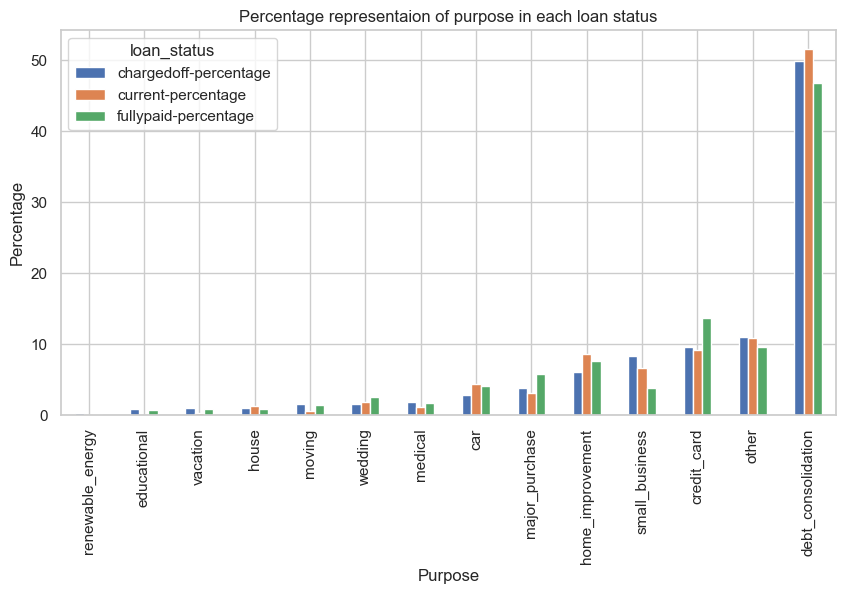

In [25]:
purposeIncomeAnalysis=relevantColumns[['purpose','loan_status']]

# value count will count the values of loan status 
# selecting loan_status from group and unstacking will result in dataframe having columns unique values of loan status
groupedbydf = purposeIncomeAnalysis.groupby(['purpose','loan_status']).size().unstack().fillna(0)
groupedbydf['chargedoff-percentage'] = (groupedbydf['Charged Off']/groupedbydf['Charged Off'].sum())*100
groupedbydf['current-percentage'] = (groupedbydf['Current']/groupedbydf['Current'].sum())*100
groupedbydf['fullypaid-percentage'] = (groupedbydf['Fully Paid']/groupedbydf['Fully Paid'].sum())*100

charged_off_percent=groupedbydf[['chargedoff-percentage','current-percentage','fullypaid-percentage']]
charged_off_percent=charged_off_percent.sort_values(by='chargedoff-percentage')
charged_off_percent.plot(kind='bar', figsize=(10, 5))

plt.title('Percentage representaion of purpose in each loan status')
plt.xlabel('Purpose')
plt.ylabel('Percentage')
plt.show()

### Observation
- It is observed that highest number of defaults happen in debt consolidation, while reneable enery, education, and house loans are safe bet
 - It can be concluded that majorly if loan is taken to resolve payment of other debt are most likely to default. 
 - Charged off loans are also high in Small business may because low net income to pay for loan installments.
 - Credit card is another such category with high defaults

### Yearly distribution of different types of loans
### Total loans distribution against purpose over the years

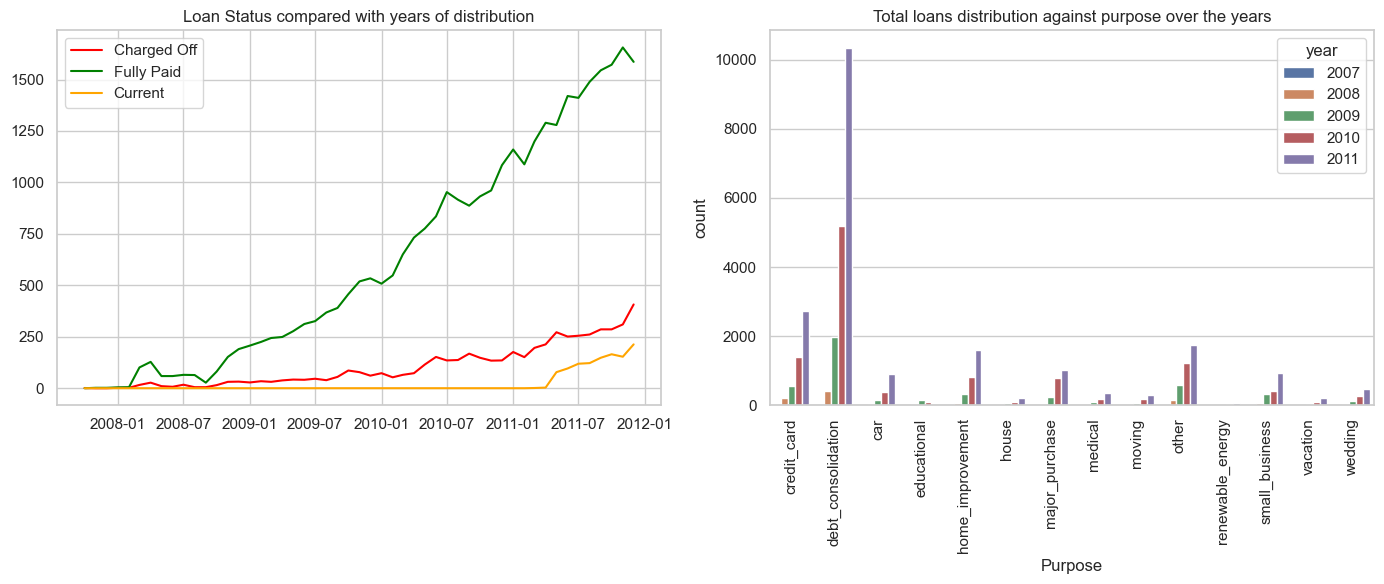

In [26]:
loanTimining=relevantColumns[['issue_d','loan_status','id','purpose','Date','year']]

loanTimining=loanTimining.sort_values(by='Date')

# Group and count loan statuses for each date
loanStsDategrouped = loanTimining.groupby(['Date', 'loan_status']).size().unstack(fill_value=0)
loanStsDategrouped=loanStsDategrouped.reset_index()

fig, axis = plt.subplots(1, 2, figsize=(14, 6))

axis[0].plot(loanStsDategrouped['Date'],loanStsDategrouped['Charged Off'], color='red')
axis[0].plot(loanStsDategrouped['Date'],loanStsDategrouped['Fully Paid'], color='green')
axis[0].plot(loanStsDategrouped['Date'],loanStsDategrouped['Current'],color='orange')
axis[0].set_title('Loan Status compared with years of distribution')
axis[0].legend(['Charged Off','Fully Paid','Current'])


purposeDategrouped = loanTimining.groupby(['year', 'purpose']).size()
purposeDatedfResetIndex=purposeDategrouped.reset_index()
purposeDatedfResetIndex = purposeDatedfResetIndex.rename(columns={0: 'count'})
sns.barplot(x='purpose', y='count', hue='year', data=purposeDatedfResetIndex, ax=axis[1])
axis[1].set_title('Total loans distribution against purpose over the years')
axis[1].set_xlabel('Purpose')
axis[1].set_ylabel('count')

plt.xticks(rotation=90)
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()



### Observations
- It has been observed that charged off loans remain almost constant till 2010 while fully paid loans also grew during this period
- From 2010 there has been a constant increase in charged off loans. Fully paid loan continues to grow during this period
- It can be concluded with increase in loan distribution from 2010, charged off loans have also increased.
- Loan disbursement of certain purpose increases from 2008 t0 2011 and highest increase of loans is for debt cpnsolidation. It means this is not safe category of purpose for loan disbursement. Certain other such categories are credit card and others also have high number of chanrged off loans.

### Distribution of interest rates for different purposes


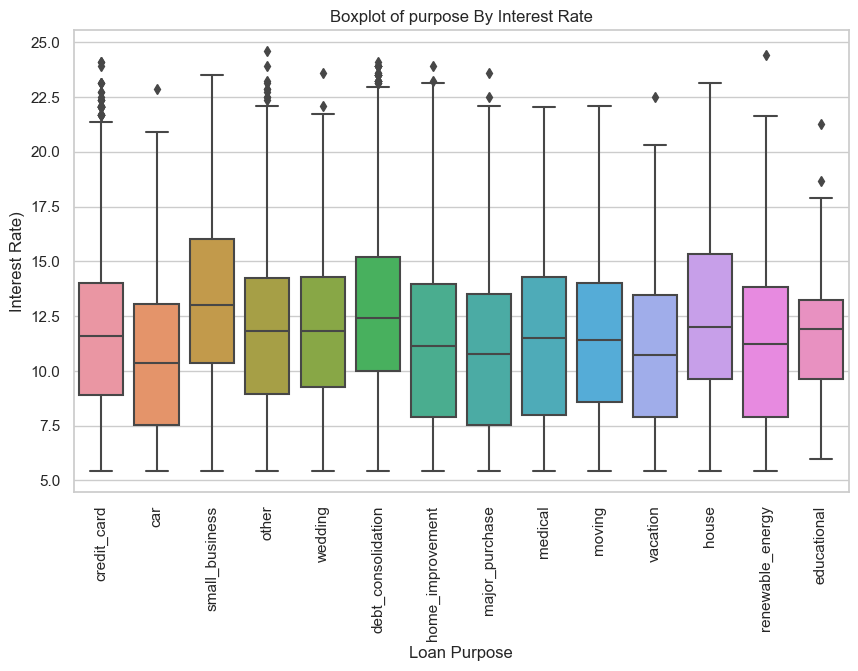

In [27]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))  
sns.boxplot(data=interestrateAnalysis, x="purpose", y="intrt_without_percent_sign")
plt.xlabel("Loan Purpose")
plt.ylabel("Interest Rate)")
plt.title("Boxplot of purpose By Interest Rate")
plt.xticks(rotation=90)
plt.show()

### Observations
- It can be observed that loans of small business and debt consolidation are given at highest interest rate
- Its clear that due to high interest rates the number of charged off loans is high for debt consolidation, as highlighted in the last section.


# Part 4 - Segmented Univariate Analysis

### Analysis of dti ratio, monthly debt, monthly income, annual income for different loan status(fully paid, charged off, current)
- dti ratio is  borrower’s total monthly debt payments divided by the borrower’s self-reported monthly income.Idea behind this analysis is the person defaulting on loan should have high dti ratio.
- dti ratio will be ploted against loan status for different borrowers.
- Monthly Income and Monthly debt is plotted against loan status

C:\Users\asus\AppData\Local\Temp\ipykernel_13928\477304834.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtiAnalysis['monthly_income']=dtiAnalysis['monthly_income']/1000000


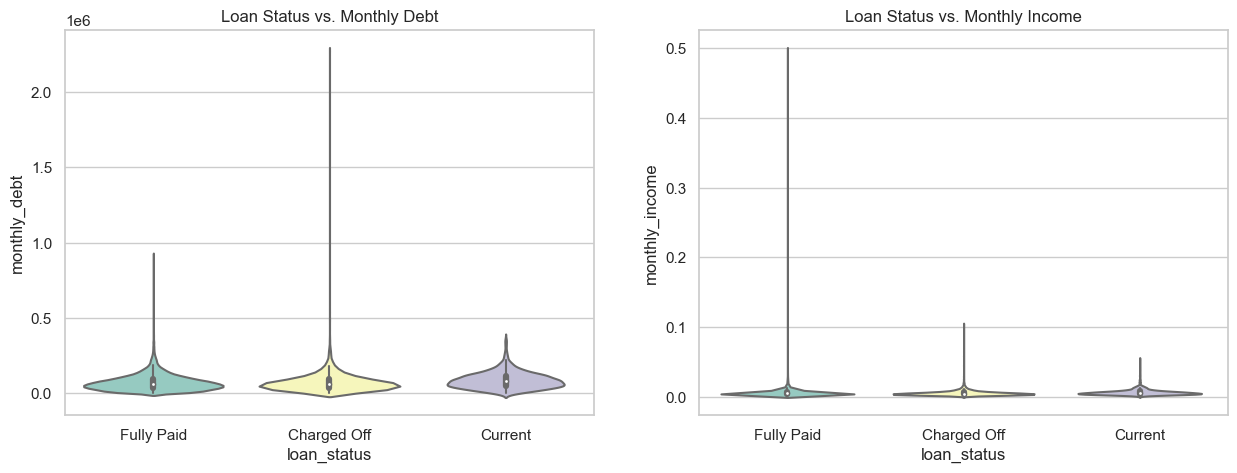

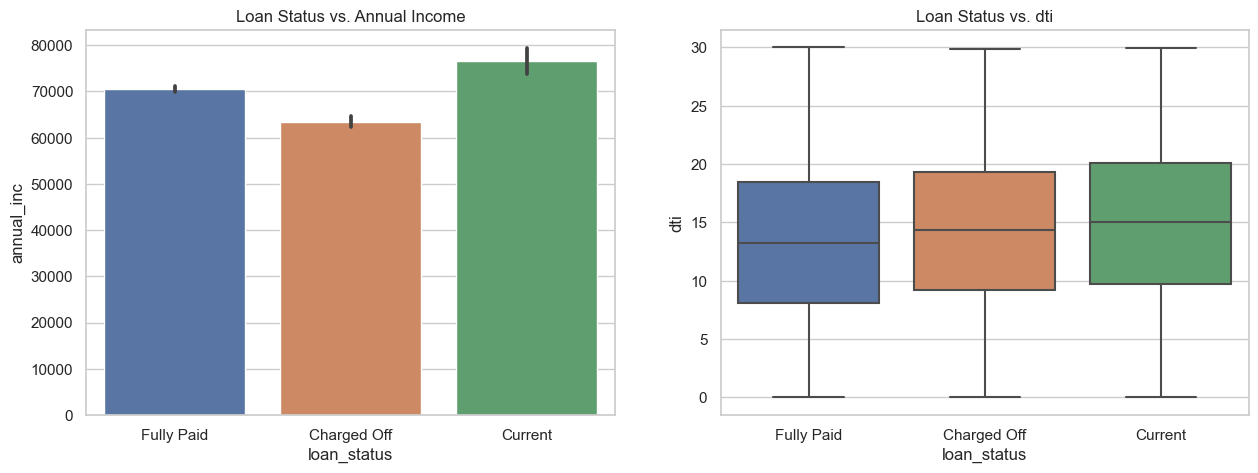

In [28]:
dtiAnalysis=relevantColumns[['loan_status','dti','annual_inc','monthly_income','monthly_debt','emp_length','home_ownership']]

dtiAnalysis['monthly_income']=dtiAnalysis['monthly_income']/1000000

fig, axis = plt.subplots(1, 2, figsize=(15, 5))
sns.set(style="whitegrid")

sns.violinplot(x="loan_status" ,y="monthly_debt",data=dtiAnalysis, palette="Set3",  ax=axis[0])
axis[0].set_title("Loan Status vs. Monthly Debt")


sns.violinplot(x="loan_status" ,y="monthly_income",data=dtiAnalysis, palette="Set3",ax=axis[1])
axis[1].set_title("Loan Status vs. Monthly Income")



fig, axis = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x="loan_status" ,y="annual_inc",data=dtiAnalysis, ax=axis[0])
axis[0].set_title("Loan Status vs. Annual Income")

sns.boxplot(x="loan_status" ,y="dti",data=dtiAnalysis, ax=axis[1])
axis[1].set_title("Loan Status vs. dti")

sns.set(style="whitegrid")
plt.subplots_adjust(hspace=0.5)
plt.show()



### Observation

- Borrowers who have fully paid the loan have relatively lower debt to income ratio
- There are higher outliers for fully paid in comparision to charged off and current loan status in monthly income
- There are higher outliers for charged off in comparisoin to fully paid and current loan status in monthly debt plot
- Range of monthly income from .25 to .75 quartile for fully paid, current and charged off loans are almost same
- As there are larger outliers in income for fully paid in comparison to other loan, resulting in lower dti for fully paid
- These chart implies that overall income is less than the debt.

### Analyzing Derived metrics Income_category
- Created derived metrics income_category from monthly_income
- Identified these category by finding mean, 75%, 25% etc. Based on this categorised monthly income as low,middle, upper middle and high income groups
- Groupby income category and analyze loan status, source verification and interest rates across different groups

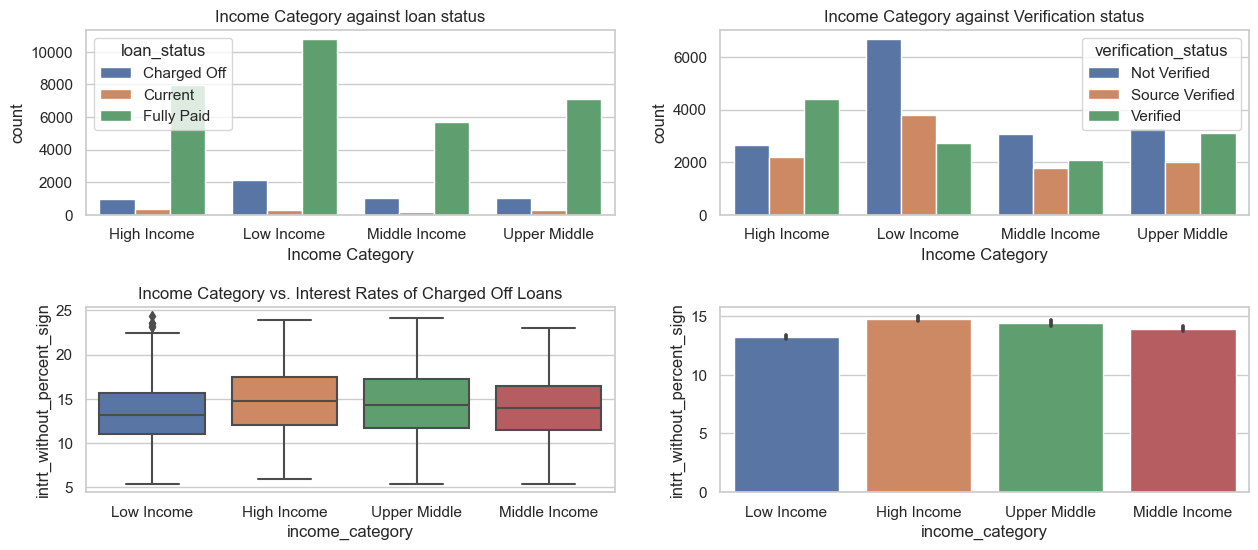

In [29]:
# This monthly income is analysised to find mean and interqutile income to identify high, low ,and middle income
# print(relevantColumns['monthly_income'].describe())

def findIncomeCategory(monthlyIncome):
    if monthlyIncome <=4000:
        return 'Low Income'
    elif monthlyIncome > 4000 and monthlyIncome <= 5000:
        return 'Middle Income'
    elif monthlyIncome > 5000 and monthlyIncome <=7000:
        return 'Upper Middle'
    else:
        return 'High Income'


relevantColumns['income_category']= relevantColumns['monthly_income'].apply(findIncomeCategory)
incomeCatLoanStsIntDf=relevantColumns[['intrt_without_percent_sign','loan_status','verification_status','income_category']]

fig, axis = plt.subplots(2, 2, figsize=(15, 6))

incomeCatLoanStsDf=incomeCatLoanStsIntDf.groupby(['income_category', 'loan_status']).size()
incomeCatLoanStsDf=incomeCatLoanStsDf.reset_index()
incomeCatLoanStsDf=incomeCatLoanStsDf.rename(columns={0: 'count'})

sns.barplot(x='income_category', y='count', hue='loan_status', data=incomeCatLoanStsDf, ax=axis[0,0])
sns.set_style('whitegrid')
axis[0,0].set_title('Income Category against loan status')
axis[0,0].set_xlabel('Income Category')
axis[0,0].set_ylabel('count')

incomeCatVeriStsDf=incomeCatLoanStsIntDf.groupby(['income_category', 'verification_status']).size()
incomeCatVeriStsDf=incomeCatVeriStsDf.reset_index()
incomeCatVeriStsDf=incomeCatVeriStsDf.rename(columns={0: 'count'})
sns.barplot(x='income_category', y='count', hue='verification_status', data=incomeCatVeriStsDf, ax=axis[0,1])
axis[0,1].set_title('Income Category against Verification status')
axis[0,1].set_xlabel('Income Category')
axis[0,1].set_ylabel('count')

incomeCatIntDf=incomeCatLoanStsIntDf[incomeCatLoanStsIntDf['loan_status']=='Charged Off']

sns.boxplot(x="income_category", y="intrt_without_percent_sign", data=incomeCatIntDf, ax=axis[1,0])
axis[1,0].set_title("Income Category vs. Interest Rates of Charged Off Loans")


sns.barplot(x='income_category', y='intrt_without_percent_sign', data=incomeCatIntDf, ax=axis[1,1])


sns.set_style('whitegrid')
plt.subplots_adjust(hspace=0.5)
# plt.xticks(rotation=45)
plt.show()

# Observation
- Large number of loans are disbursed to low income group and this group is the highest number of charged off loans
- Category with lowest number of defaulters is high income group 
- Low income group has highest not verified source of income. There can be a possibility that this income is not stable
- Low income has lowest median loan interest rate but this interest rate is not stoping from defaulting people in this group. This is because their income source is not stable and not verified or even this interest rate is still high to pay off

# Part 5 - Segmented Bivariate Analysis

### Distribution of different types of loan among various purposes and grades

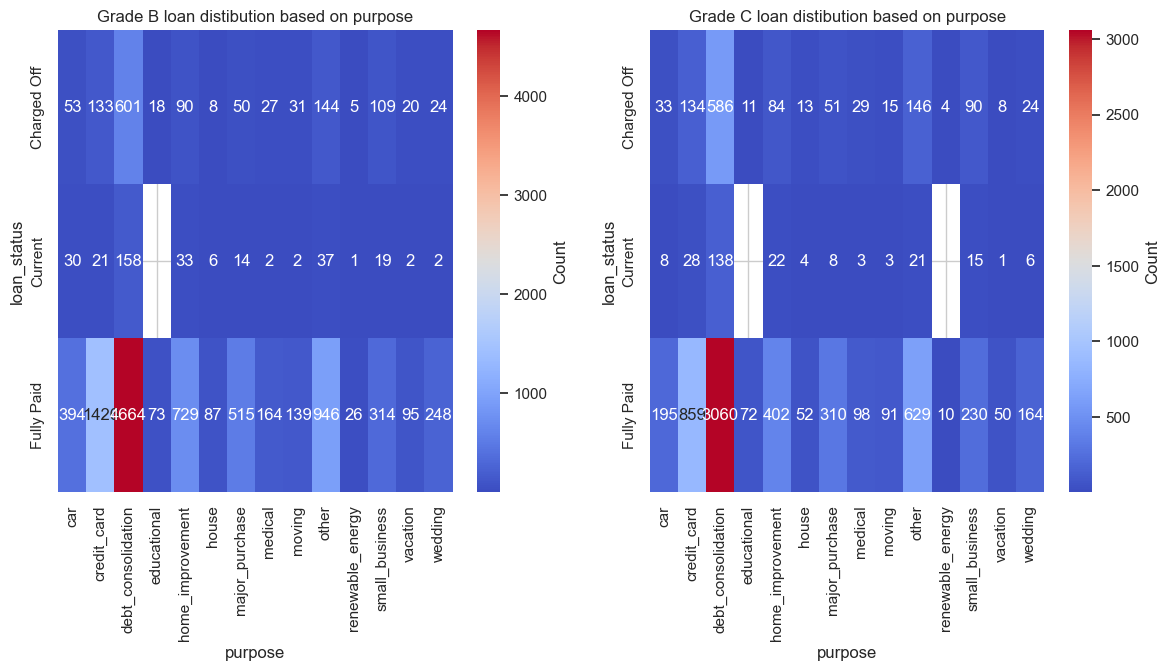

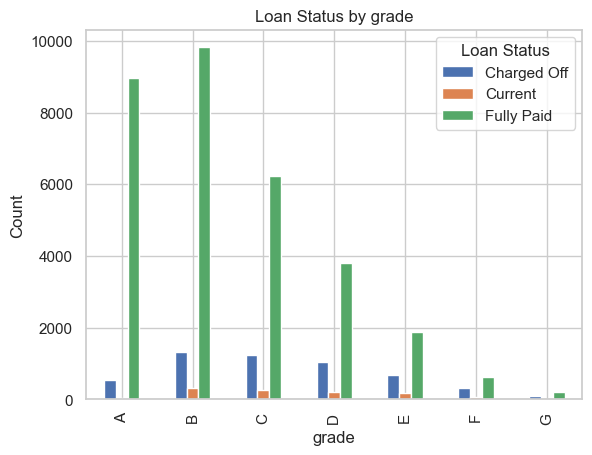

In [30]:
incomeRelatedAnalysis=relevantColumns[['int_rate','grade','purpose','loan_status','monthly_income','emp_length','verification_status','home_ownership']]

fig, axis = plt.subplots(1, 2, figsize=(14, 6))

grade_b_df = incomeRelatedAnalysis[(incomeRelatedAnalysis['grade'])=='B'].groupby(['loan_status','purpose']).size()
grade_b_df = grade_b_df.reset_index()
grade_b_df = grade_b_df.rename(columns={0: 'count'})

grade_b_pivot_df = grade_b_df.pivot_table(index='loan_status', columns='purpose', values='count', aggfunc='sum')

sns.heatmap(grade_b_pivot_df, annot=True, cmap="coolwarm", fmt='g', cbar_kws={'label': 'Count'},ax=axis[0])
axis[0].set_title('Grade B loan distibution based on purpose')

grade_c_df = incomeRelatedAnalysis[(incomeRelatedAnalysis['grade'])=='C'].groupby(['loan_status','purpose']).size()
grade_c_df = grade_c_df.reset_index()
grade_c_df = grade_c_df.rename(columns={0: 'count'})

grade_c_df_pivot_df = grade_c_df.pivot_table(index='loan_status', columns='purpose', values='count', aggfunc='sum')

sns.heatmap(grade_c_df_pivot_df, annot=True, cmap="coolwarm", fmt='g', cbar_kws={'label': 'Count'},ax=axis[1])
axis[1].set_title('Grade C loan distibution based on purpose')



incomeRelatedAnalysis.groupby(['grade', 'loan_status']).size().unstack().plot(kind='bar', stacked=False)

plt.title('Loan Status by grade')
plt.xlabel('grade')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.subplots_adjust(hspace=0.5)
plt.legend(title='Loan Status')
plt.show()


### Observation
- G grade has least number of defaulters with least number of laons disbursed.
- B grade has highest number loans disbursed with highest number of of fully paid loans.
- Grade B and C have highest number of charged off loans.
- For Grade B and C, small business , debt consolidation,others and credit card have highest number of charged off loans.
    